<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>
# Laboratorio 1

### Exploración de datos del Sistema Nacional de Estadísticas sobre Ejecución de la Pena – SNEEP
##### En este conjunto de datos se detalla información recopilada en el censo realizado sobre el total de la población detenida al día 31 de diciembre de cada año, en cada establecimiento de la República Argentina. La unidad de análisis son las personas alojadas en dichos establecimientos http://datos.gob.ar/dataset/sistema-nacional-estadisticas-sobre-ejecucion-pena---sneep.
##### Para este analisis se tiene en cuenta el año 2016 y 2015.

In [90]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)
#import corrplot
# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

In [92]:
sneep = pd.read_csv('E:\Diplomatura\Dataset\sneep\sneep2015_2016.csv',
                          encoding='utf8')

In [93]:
sneep[:3]

,anio_censo,provincia_id,provincia_descripcion,establecimiento_id,establecimiento_descripcion,edad,sexo_id,sexo_descripcion,nacionalidad_id,nacionalidad_descripcion,estado_civil_id,estado_civil_descripcion,nivel_instruccion_id,nivel_instruccion_descripcion,ultima_situacion_laboral_id,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_id,capacitacion_laboral_al_ingresar_descripcion,ultimo_lugar_residencia_id,ultimo_lugar_residencia_descripcion,ultima_provincia_residencia_id,ultima_provincia_residencia_descripcion,jurisdiccion_id,jurisdiccion_descripcion,situacion_legal_id,situacion_legal_descripcion,fecha_detencion,fecha_condenado,establecimiento_procedencia_id,establecimiento_procedencia_descripcion,delito1_id,delito1_descripcion,delito2_id,delito2_descripcion,delito3_id,delito3_descripcion,delito4_id,delito4_descripcion,delito5_id,delito5_descripcion,horas_trabajo_remunerado_id,horas_trabajo_remunerado_descripcion,participacion_programa_laboral,participacion_programa_educativo_id,participacion_programa_educativo_descripcion,participacion_actividades_deportivas,recibio_atencion_medica_ult_anio,recibio_atencion_medica_ult_anio_descripcion,recibio_visitas_ultimo_anio,participo_alteracion_orden_ult_anio_id,participo_alteracion_orden_ult_anio_descripcion,tipo_infraccion_disciplinaria_id,tipo_infraccion_disciplinaria_descripcion,sancion_aplicada_id,sancion_aplicada_descripcion,calificacion_conducta_id,calificacion_conducta_descripcion,tentativa_fugas_evasiones_id,tentativa_fugas_evasiones_descripcion,tentativa_suicidio,fue_lesionado_id,fue_lesionado_descripcion,duracion_condena_anios,duracion_condena_meses,duracion_condena_rango,tipo_condena,tiene_medidas_seguridad,es_reincidente_id,es_reincidente_descripcion,tiene_periodo_progresividad_id,tiene_periodo_progresividad_descripcion,reparticion_id,reparticion_descripcion,tuvo_salidas_transitorias_id,tuvo_salidas_transitorias_descripcion,incorporado_reg_semi_libertad_id,incorporado_reg_semi_libertad_descripcion,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_id,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_id,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro
0,2016,1,Buenos Aires,18,UNIDAD 13 - JUNIN,29.0,1,Masculino,1.0,Argentina,1.0,Soltero,4.0,Secundario incompleto,2.0,Trabajador de tiempo parcial,1.0,Tiene algún oficio,2.0,Urbano,1,Buenos Aires,1,PROVINCIAL - Buenos Aires,2,Procesado,2015-10-14,NaN,2.0,Deriv. de otro establecimiento,14.0,Hurto y/o tentativa de hurto,10.0,Amenazas,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,6.0,No participa de ningún programa educativo,1.0,2.0,No,1.0,5.0,No participó de ninguna alteración,4.0,No cometió Infracción disciplinaria,4.0,Perm. aloj. indiv. o celda hasta 15 días inint.,7.0,Sin calificación,3.0,No,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,Provincial,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
1,2016,1,Buenos Aires,18,UNIDAD 13 - JUNIN,24.0,1,Masculino,1.0,Argentina,1.0,Soltero,2.0,Primario incompleto,2.0,Trabajador de tiempo parcial,1.0,Tiene algún oficio,2.0,Urbano,1,Buenos Aires,1,PROVINCIAL - Buenos Aires,2,Procesado,2016-06-29,NaN,3.0,Deriv. de una instit. Policial,10.0,Amenazas,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,6.0,No participa de ningún programa educativo,1.0,19.0,SI - OTRAS ENFERMEDADES,1.0,5.0,No participó de ninguna alteración,4.0,No cometió Infracción disciplinaria,4.0,Perm. aloj. indiv. o celda hasta 15 días inint.,3.0,Buena,3.0,No,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,Provincial,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
2,2016,1,Buenos Aires,18,UNIDAD 13 - JUNIN,53.0,1,Masculino,1.0,Argentina,1.0,Soltero,1.0,Ninguno,2.0,Trabajador de tiempo parcial,1.0,Tiene algún oficio,2.0,Urbano,1,Buenos Aires,1,PROVINCIAL - Buenos Aires,1,Condenado,2012-07-23,2014-02-25,2.0,Deriv. de otro establecimiento,8.0,Violaciones,0.0,NaN,0.0,NaN,0.0,NaN,0.0,Na

In [94]:
sneep.shape

(147623, 85)

## Estadísticas descriptivas
### Cálculos estadísticos de la edad de la población 
* Con los datos tomados de los años 2015 y 2016 se hara primero un analisis por edad para ver si existe una tendencia en los datos.

In [95]:
print('La Media en la edad de la población es: {:.0f}'.format(sneep.edad.mean()))
print('La Mediana en la edad de la población es: {:.0f}'.format(sneep.edad.median()))
print("La Moda en la edad de la población es: %d" % sneep.edad.mode())
print('La Desviación en la edad de la población es: {:.0f}'.format(sneep.edad.std()))

La Media en la edad de la población es: 33
La Mediana en la edad de la población es: 31
La Moda en la edad de la población es: 24
La Desviación en la edad de la población es: 11


* Si vemos la distribución de los datos en un gráfico de barra se observa que efectivamente la Moda es de 24 y que los datos responden a una distribución normal.

Text(0.5,1,'Distribución de Frecuencias por Edad')

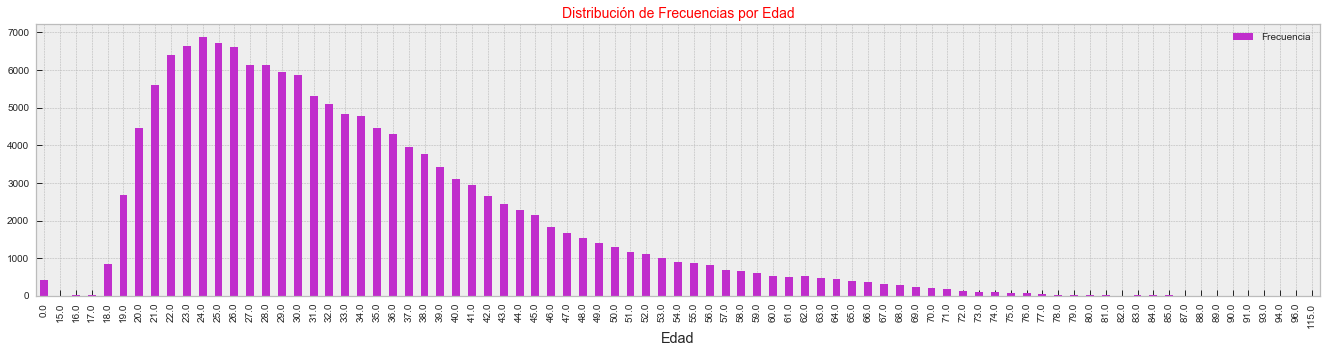

In [96]:
datos= sneep.edad.value_counts()
lista_evento = datos.sort_index()
df_Edad = pd.DataFrame({
   'Edad' : lista_evento.index.values,
   'Frecuencia' : lista_evento.get_values(),
}) 
_ = df_Edad.plot( x='Edad',y='Frecuencia',kind='bar', figsize = (23,5), color='#c02ecc')
plt.title('Distribución de Frecuencias por Edad', fontsize=14, color='red')

### Cálculos estadísticos de la duración de la condena  
* Con los datos tomados de los años 2015 y 2016 se hara un analisis por duración de la condena para ver si existe una tendencia en los datos.

In [75]:
print('La Media en los años de condena es: {:.0f}'.format(sneep.duracion_condena_anios.mean()))
print('La Mediana en los años de condena es: {:.0f}'.format(sneep.duracion_condena_anios.median()))
print("La Moda en los años de condena es: %d" % sneep.duracion_condena_anios.mode())
print('La Desviación en los años de condena es: {:.0f}'.format(sneep.duracion_condena_anios.std()))

La Media en los años de condena es: 4
La Mediana en los años de condena es: 0
La Moda en los años de condena es: 0
La Desviación en los años de condena es: 5


* Analizando con los calculos estadísticos y el gráfico de distrubuciones, la cantidad de años de condena tiende a menos de un año. Si excluyeramos los condenados de menos de un año la distribución en los datos responde a una distribución normal.  

Text(0.5,1,'Distribución de Frecuencias por Años de Condena')

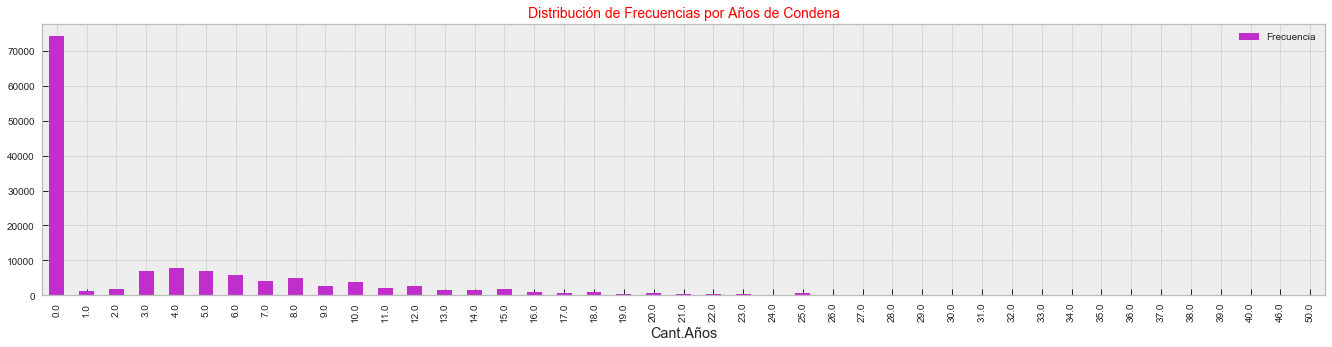

In [97]:
datos_condena= sneep.duracion_condena_anios.value_counts()
lista_evento_1 = datos_condena.sort_index()
df_Condena = pd.DataFrame({
   'Cant.Años' : lista_evento_1.index.values,
   'Frecuencia' : lista_evento_1.get_values(),
}) 
_ = df_Condena.plot( x='Cant.Años',y='Frecuencia',kind='bar', figsize = (23,5), color='#c02ecc')
plt.title('Distribución de Frecuencias por Años de Condena', fontsize=14, color='red')

* Si buscamos la Funcion de Densidad de Probabilidades (FPD) nos encontramos con una distribución de los datos muy similar a la que representamos con el gráfico de barras. 

Text(0.5,1,'Probability density function of normal distribution')

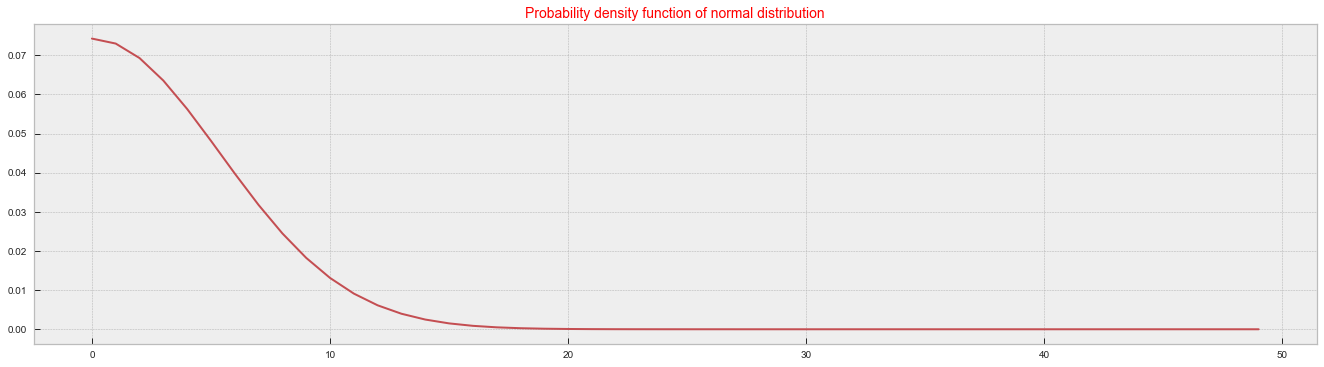

In [98]:
mu = sneep.duracion_condena_anios.median()
sigma=sneep.duracion_condena_anios.std()
rng = range(0,50)
dist = norm(mu, sigma)

plt.figure(figsize = (23,20))
plt.subplot(311) 
plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
plt.title('Probability density function of normal distribution', fontsize=14, color='red')

### Análisis de la variable edad por genero de la población

In [193]:
nuevo_dt= sneep[ ~dataset['edad'].isnull()& ~sneep['sexo_descripcion'].isnull()  & ~sneep['duracion_condena_anios'].isnull()]
Frecuencia_edad= sneep.edad.value_counts()
df_nvo_dt = pd.DataFrame({
   'Edad' : nuevo_dt.edad,
   'Sexo' : nuevo_dt.sexo_descripcion,
   'AñosdeCondena' : nuevo_dt.duracion_condena_anios,
}) 

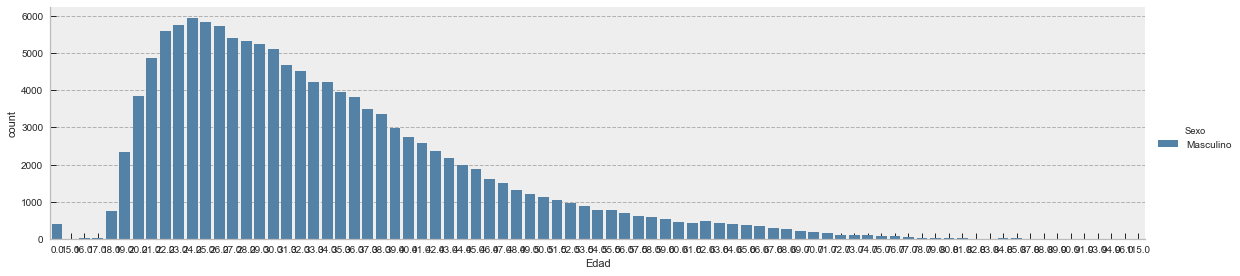

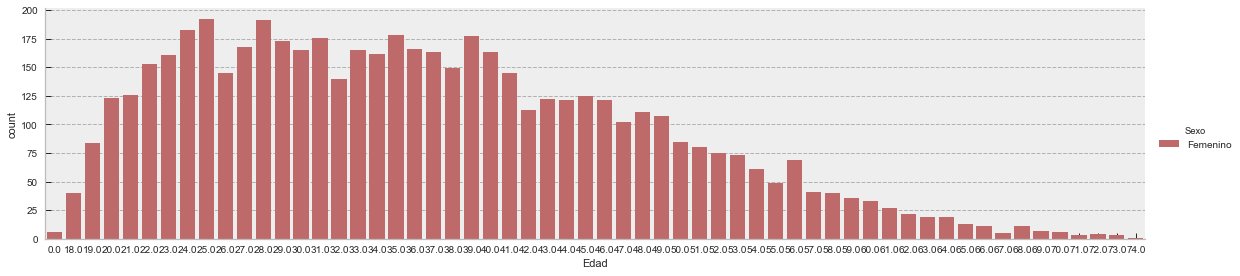

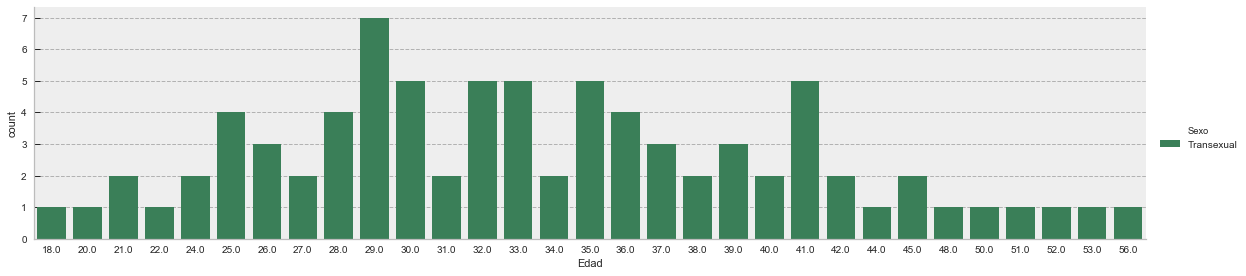

In [194]:
pal = dict(Masculino="#4682B4", Femenino="#CD5C5C",Transexual="#2E8B57")
gr_1 = sns.factorplot(x="Edad",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'],kind="count", aspect=4, palette=pal, legend_out=True)
gr_2 = sns.factorplot(x="Edad",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'],kind="count", aspect=4, palette=pal, legend_out=True)

gr_3 = sns.factorplot(x="Edad",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'],kind="count", aspect=4, palette=pal, legend_out=True)


* De este análisis (edad por sexo) podemos decir que la población Masculina es quien predomina en los datos, y la que hace que los datos tengan una distribución normal, al igual que el sexo femenino.
* Haciendo el calculo de media, mediana, moda y desviación en cuanto a la edad por sexo nos da lo siguiente:

In [195]:
media = [df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].Edad.mean(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].Edad.mean(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].Edad.mean()]
mediana=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].Edad.median(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].Edad.median(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].Edad.median()]
mode=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].Edad.mode().values[0], df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].Edad.mode().values[0],df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].Edad.mode().values[0]]
std=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].Edad.std(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].Edad.std(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].Edad.std()]
d = {'Media': media,'Mediana': mediana,'Moda': mode,'Desviacion estandar': std }
df = pd.DataFrame(data=d, index=['Masculino','Femenino','Transexual'])
df

,Desviacion estandar,Media,Mediana,Moda
Masculino,11.356001,33.519206,31.0,24.0
Femenino,11.461570,36.572379,35.0,25.0
Transexual,7.936340,33.802469,33.0,29.0


#### Podemos concluir que predomina el genero masculino en la población, y cuando vemos por edad tanto para el genero masculino como femenino no existe gran diferencia, como si se nota en el genero transexual. Hay una distribucion normal en los datos que se observan del sexo masculino y femenino.

### Análisis de la variable años de condenas por genero de la población

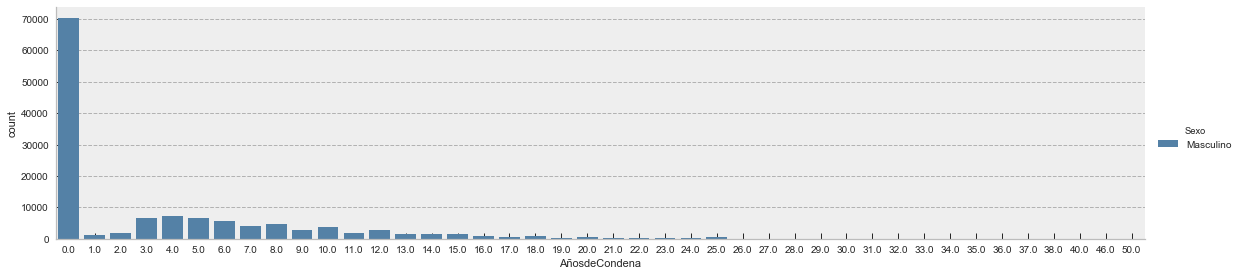

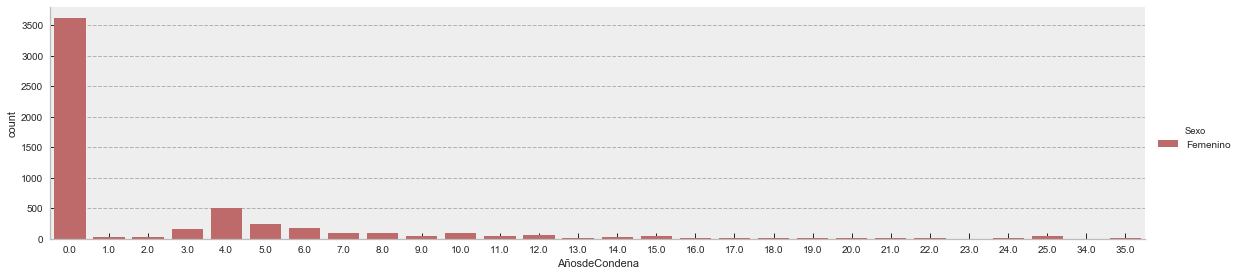

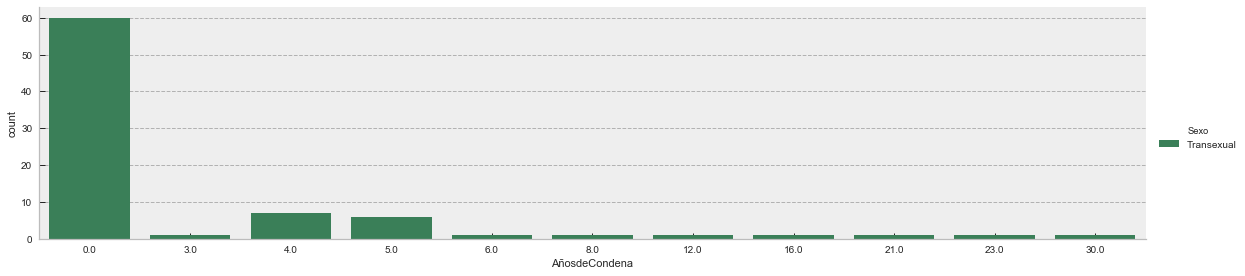

In [196]:
gr_4 = sns.factorplot(x="AñosdeCondena",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'],kind="count", aspect=4, palette=pal, legend_out=True)
gr_5 = sns.factorplot(x="AñosdeCondena",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'],kind="count", aspect=4, palette=pal, legend_out=True)
gr_6 = sns.factorplot(x="AñosdeCondena",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'],kind="count", aspect=4, palette=pal, legend_out=True)


* De este análisis vemos que la moda para los tres generos va ser la misma y que las condenas mas largas se dan en el genero masculino
* Haciendo el calculo de media, mediana, moda y desviación en cuanto a la edad por sexo nos da lo siguiente:

In [197]:
media = [df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].AñosdeCondena.mean(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].AñosdeCondena.mean(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].AñosdeCondena.mean()]
mediana=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].AñosdeCondena.median(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].AñosdeCondena.median(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].AñosdeCondena.median()]
mode=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].AñosdeCondena.mode().values[0], df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].AñosdeCondena.mode().values[0],df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].AñosdeCondena.mode().values[0]]
std=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].AñosdeCondena.std(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].AñosdeCondena.std(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].AñosdeCondena.std()]
d = {'Media': media,'Mediana': mediana,'Moda': mode,'Desviacion estandar': std }
df = pd.DataFrame(data=d, index=['Masculino','Femenino','Transexual'])
df

,Desviacion estandar,Media,Mediana,Moda
Masculino,5.390394,3.678406,0.0,0.0
Femenino,4.709231,2.430948,0.0,0.0
Transexual,5.308274,2.185185,0.0,0.0


#### Podemos concluir que predomina el genero masculino en la población, y cuando vemos la cantidad de años de condena por genero no existe gran diferencia en los años de encuesta 2015 y 2016.